### Plan (draft 1):
- Inspect data
- research and choose model

In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [8]:
df = df[df.power != 0]
df

[] grepper.com, "delete row with zero value in a column pyton; Code Answer
", https://www.codegrepper.com/code-examples/delphi/delete+row+with+zero+value+in+a+column+pyton

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [9]:
import matplotlib.pyplot as plt

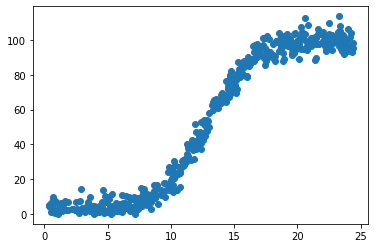

In [10]:
plt.scatter(df["speed"], df["power"])
plt.show()